# Project: Portfolio - Final Project

**Instructions for Students:**

Please carefully follow these steps to complete and submit your assignment:

1. **Completing the Assignment**: You are required to work on and complete all tasks in the provided assignment. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: If you don't previously have a folder for collecting assignments, you must create a new folder in your Google Drive. This will be a repository for all your completed assignment files, helping you keep your work organized and easy to access.
   
3. **Uploading Completed Assignment**: Upon completion of your assignment, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your assignment Google Drive folder. This is crucial for the submission and evaluation of your assignment.
   
5. **Setting Permission toPublic**: Please make sure your **Google Drive folder is set to public**. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth assignment process for you and the reviewers.

**Description:**

Welcome to your final portfolio project assignment for AI Bootcamp. This is your chance to put all the skills and knowledge you've learned throughout the bootcamp into action by creating real-world AI application.

You have the freedom to create any application or model, be it text-based or image-based or even voice-based or multimodal.

To get you started, here are some ideas:

1. **Sentiment Analysis Application:** Develop an application that can determine sentiment (positive, negative, neutral) from text data like reviews or social media posts. You can use Natural Language Processing (NLP) libraries like NLTK or TextBlob, or more advanced pre-trained models from transformers library by Hugging Face, for your sentiment analysis model.

2. **Chatbot:** Design a chatbot serving a specific purpose such as customer service for a certain industry, a personal fitness coach, or a study helper. Libraries like ChatterBot or Dialogflow can assist in designing conversational agents.

3. **Predictive Text Application:** Develop a model that suggests the next word or sentence similar to predictive text on smartphone keyboards. You could use the transformers library by Hugging Face, which includes pre-trained models like GPT-2.

4. **Image Classification Application:** Create a model to distinguish between different types of flowers or fruits. For this type of image classification task, pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be utilized.

5. **News Article Classifier:** Develop a text classification model that categorizes news articles into predefined categories. NLTK, SpaCy, and sklearn are valuable libraries for text pre-processing, feature extraction, and building classification models.

6. **Recommendation System:** Create a simplified recommendation system. For instance, a book or movie recommender based on user preferences. Python's Surprise library can assist in building effective recommendation systems.

7. **Plant Disease Detection:** Develop a model to identify diseases in plants using leaf images. This project requires a good understanding of convolutional neural networks (CNNs) and image processing. PyTorch, TensorFlow, and OpenCV are all great tools to use.

8. **Facial Expression Recognition:** Develop a model to classify human facial expressions. This involves complex feature extraction and classification algorithms. You might want to leverage deep learning libraries like TensorFlow or PyTorch, along with OpenCV for processing facial images.

9. **Chest X-Ray Interpretation:** Develop a model to detect abnormalities in chest X-ray images. This task may require understanding of specific features in such images. Again, TensorFlow and PyTorch for deep learning, and libraries like SciKit-Image or PIL for image processing, could be of use.

10. **Food Classification:** Develop a model to classify a variety of foods such as local Indonesian food. Pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be a good starting point.

11. **Traffic Sign Recognition:** Design a model to recognize different traffic signs. This project has real-world applicability in self-driving car technology. Once more, you might utilize PyTorch or TensorFlow for the deep learning aspect, and OpenCV for image processing tasks.

**Submission:**

Please upload both your model and application to Huggingface or your own Github account for submission.

**Presentation:**

You are required to create a presentation to showcase your project, including the following details:

- The objective of your model.
- A comprehensive description of your model.
- The specific metrics used to measure your model's effectiveness.
- A brief overview of the dataset used, including its source, pre-processing steps, and any insights.
- An explanation of the methodology used in developing the model.
- A discussion on challenges faced, how they were handled, and your learnings from those.
- Suggestions for potential future improvements to the model.
- A functioning link to a demo of your model in action.

**Grading:**

Submissions will be manually graded, with a select few given the opportunity to present their projects in front of a panel of judges. This will provide valuable feedback, further enhancing your project and expanding your knowledge base.

Remember, consistent practice is the key to mastering these concepts. Apply your knowledge, ask questions when in doubt, and above all, enjoy the process. Best of luck to you all!


In [ ]:
# @title #### Student Identity
student_id = "REA6HKPJU" # @param {type:"string"}
name = "Muhammad Dafa Wisnu Galih" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1zCd-YCAc_mRP9icetd4DgutbZfJRidPU?usp=drive_link"  # @param {type:"string"}

assignment_id = "00_portfolio_project"

## Installation and Import `rggrader` Package

In [ ]:
%pip install rggrader
from rggrader import submit

## Working Space

### Dataset Loading From Kaggle

In [ ]:
# 1. Install the Kaggle library
!pip install kaggle

# 2. Make a directory named “.kaggle”
!mkdir ~/.kaggle

# 3. Copy the “kaggle.json” into this new directory
!cp kaggle.json ~/.kaggle/

# 4. Allocate the required permission for this file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
%%capture
!unzip -u /content/new-plant-diseases-dataset.zip -d /content/new-plant-diseases-dataset

### Dataset Preparation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
        target_size=(256, 256),
        class_mode='sparse')
validation_generator = test_datagen.flow_from_directory(
        '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
        target_size=(256, 256),
        class_mode='sparse')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


### Model Building

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=15, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

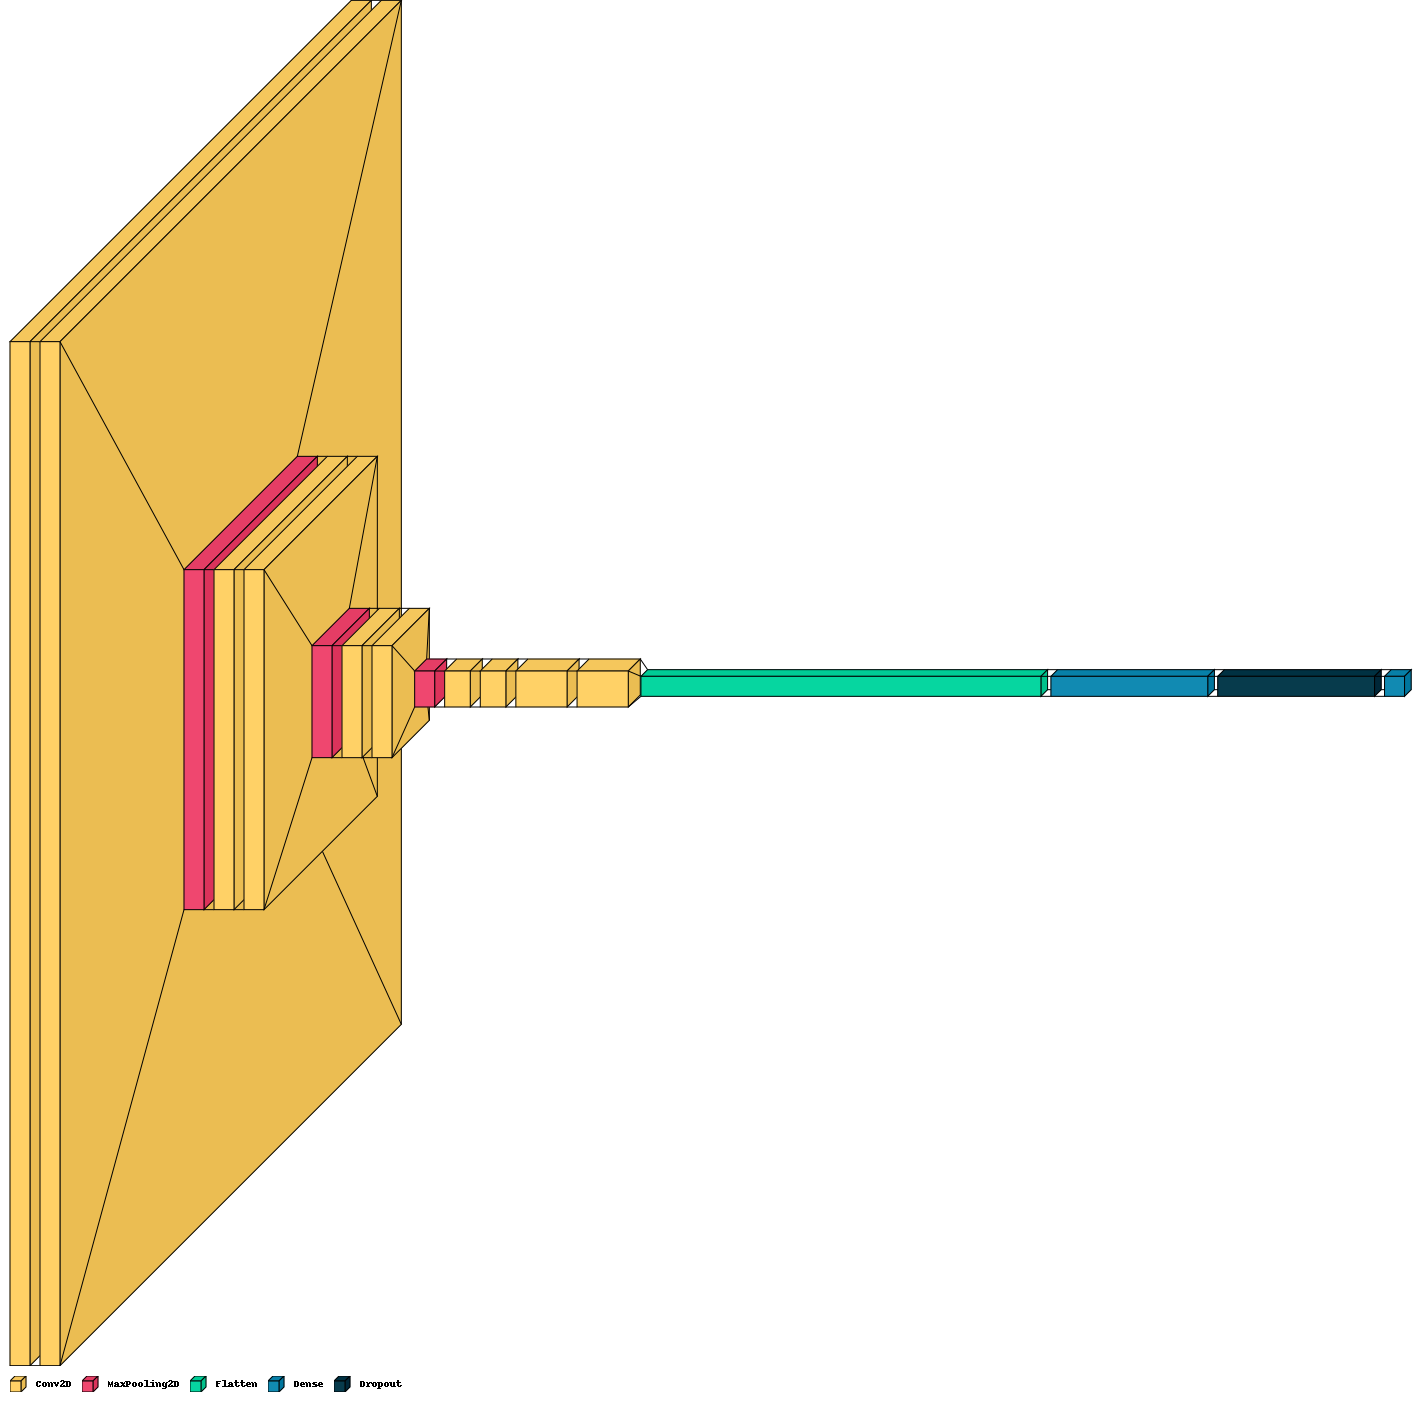

In [ ]:
import visualkeras
visualkeras.layered_view(model, to_file='output.png')

In [ ]:
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

### Training

In [ ]:
ep = 10
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    epochs = ep,
    callbacks=[early_stop, reduce_lr_on_plateau])

Epoch 1/10
2197/2197 [==============================] - 388s 168ms/step - loss: 1.7035 - accuracy: 0.5022 - val_loss: 0.7093 - val_accuracy: 0.7707 - lr: 1.0000e-04
Epoch 2/10
2197/2197 [==============================] - 362s 164ms/step - loss: 0.4784 - accuracy: 0.8477 - val_loss: 0.3092 - val_accuracy: 0.8986 - lr: 1.0000e-04
Epoch 3/10
2197/2197 [==============================] - 361s 164ms/step - loss: 0.2768 - accuracy: 0.9103 - val_loss: 0.2095 - val_accuracy: 0.9313 - lr: 1.0000e-04
Epoch 4/10
2197/2197 [==============================] - 367s 167ms/step - loss: 0.1878 - accuracy: 0.9383 - val_loss: 0.1344 - val_accuracy: 0.9547 - lr: 1.0000e-04
Epoch 5/10
2197/2197 [==============================] - 362s 165ms/step - loss: 0.1356 - accuracy: 0.9552 - val_loss: 0.1252 - val_accuracy: 0.9601 - lr: 1.0000e-04
Epoch 6/10
2197/2197 [==============================] - 359s 163ms/step - loss: 0.1113 - accuracy: 0.9627 - val_loss: 0.1047 - val_accuracy: 0.9645 - lr: 1.0000e-04
Epoch 7/10

In [ ]:
model.save("model/cnn_plant_disease_classification_model.h5")

### Result

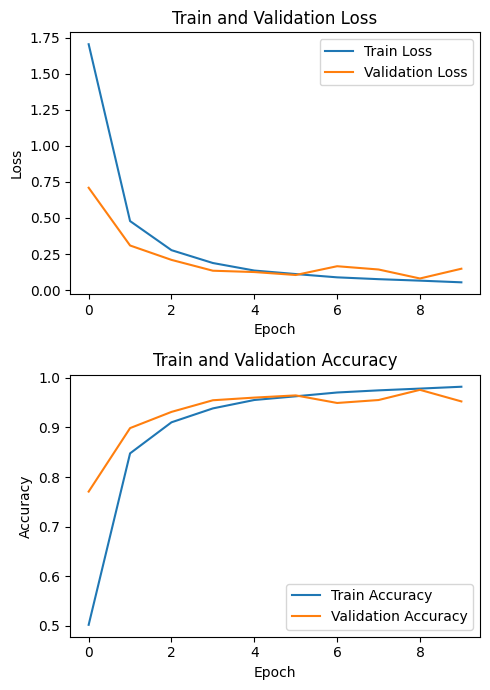

In [ ]:
plt.figure(figsize = (5,7))
plt.subplot(2,1,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(2,1,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import accuracy_score

batch_size = validation_generator.batch_size 
num_batches = len(validation_generator) 

labels = []
predictions = []

for i in range(num_batches):
    x_batch, y_batch = validation_generator[i] 
    y_pred_batch = model.predict(x_batch)

    labels.extend(list(y_batch))
    predictions.extend(tf.argmax(y_pred_batch, 1).numpy())

accuracy = accuracy_score(labels, predictions)
print("Accuracy:", accuracy)

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 98.19 %
Test Accuracy   : 96.04 %
Precision Score : 96.19 %
Recall Score    : 96.04 %


<Figure size 2000x500 with 0 Axes>

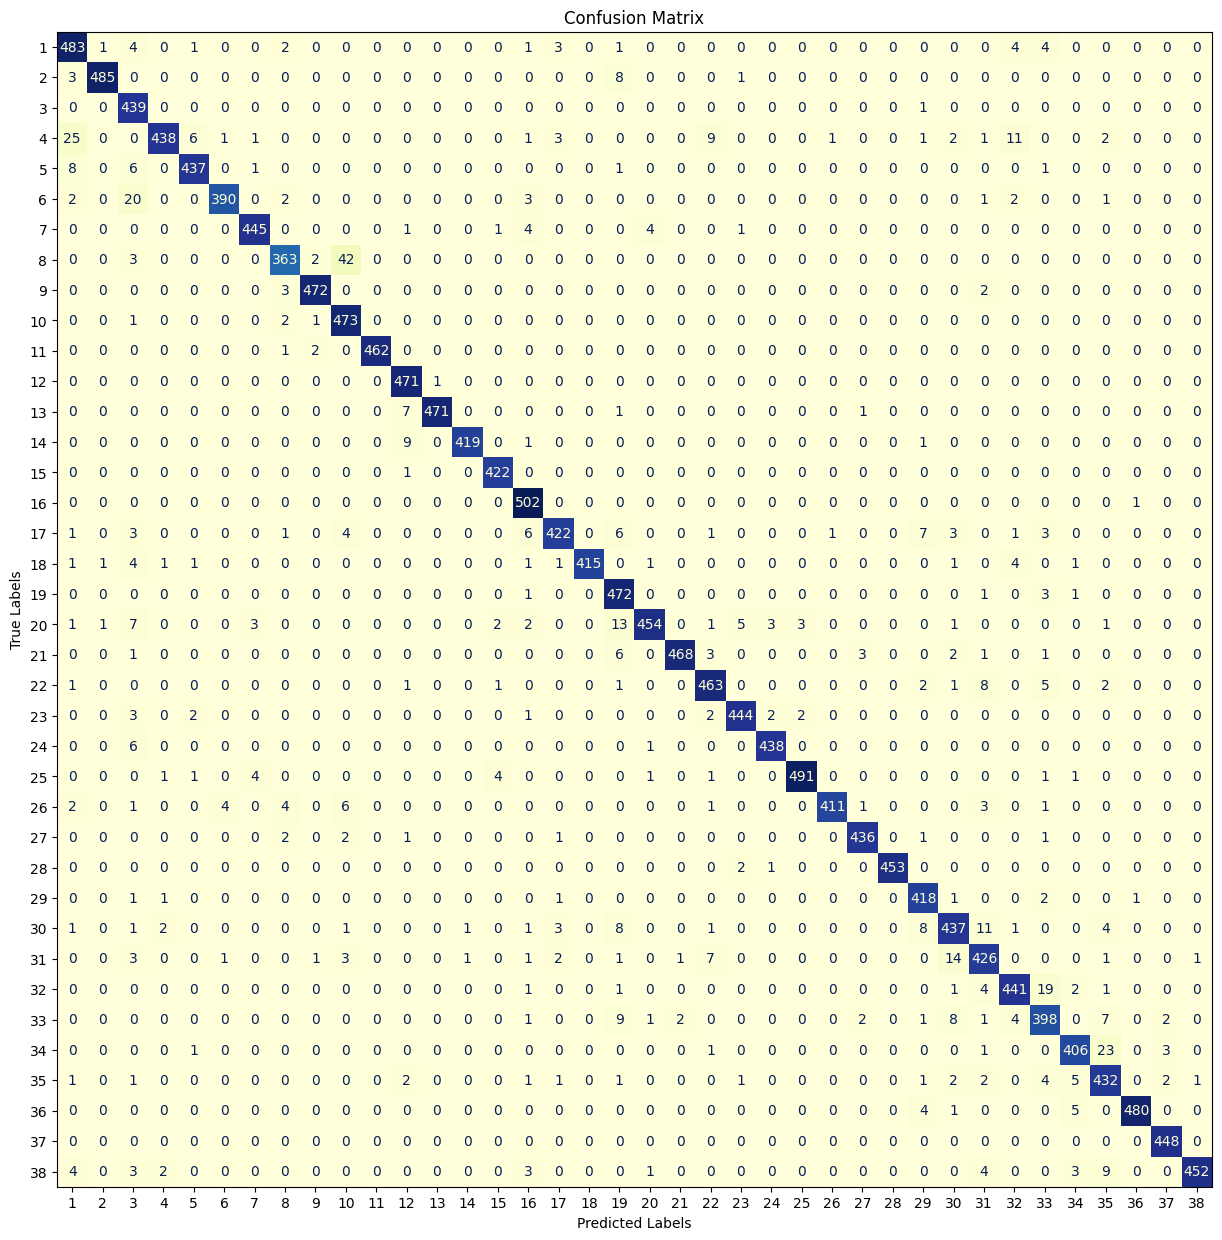

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Submit Notebook

In [ ]:
portfolio_link = "https://github.com/mdfwg/plant-disease-classification"
presentation_link = ""

question_id = "01_portfolio_link"
submit(student_id, name, assignment_id, str(portfolio_link), question_id, drive_link)

question_id = "02_presentation_link"
submit(student_id, name, assignment_id, str(presentation_link), question_id, drive_link)

# FIN